### Imports

In [42]:
!pip install ipywidgets

In [43]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import random as rnd
import math
import time

# Machine Learning

### Bronnen

**Fast.ai**

+ [Practical Deep Learning for Coders](https://course.fast.ai/)
+ [Neural net foundations](https://course.fast.ai/Lessons/lesson3.html)

**CodingTrain**:

+ [Linear Regression with Gradient Descent](https://www.youtube.com/watch?v=L-Lsfu4ab74)
+ [Mathematics of Gradient Descent](https://www.youtube.com/watch?v=jc2IthslyzM)

### Huisprijs model

+ **prijs** wordt bepaald door **prijs per vierkante meter** en **vaste grondprijs**
+ p = m*x + b

### Data

In [44]:
m2 = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990]

In [45]:
prices = [384.91367692954503, 389.8967479767937, 401.20788969026364, 465.1388607569204, 414.0688201351979, 325.18526099613297, 460.2622840847401, 425.28637650519823, 435.81289210983635, 466.1119350690599, 481.26084158347044, 553.44910806194, 524.9645554759068, 493.73550242106825, 441.31748783586255, 428.9736342758598, 524.2439536647842, 605.7756579042834, 523.9159804732369, 520.5573694360451, 572.2243354280608, 440.25182913939256, 527.1405877998808, 590.3253772815467, 624.1383069765612, 553.1559229141405, 603.3619901081537, 601.374941452989, 645.7628766092549, 520.074445002628, 644.777548130977, 505.9835725792402, 435.60382044468037, 583.5176490260349, 568.8932967557804, 701.3208570139484, 693.4986129729026, 568.6647681093013, 720.31529963436, 597.8458023030355, 668.9629307564601, 661.4270155430428, 697.0093900222645, 753.3045418080637, 747.688965355471, 734.4919571308446, 762.4963668464409, 757.4944426355083, 687.111017434628, 687.7840234328396, 712.102220810479, 786.9528480333747, 741.4919100301831, 929.5027955736383, 715.6495220469454, 703.0787780068489, 840.7931460828787, 893.5294986940426, 836.3984883587482, 866.5072142177371, 914.8441484209513, 815.4180766788587, 729.3928746802716, 798.7546416176901, 909.7027030121603, 748.9425115745198, 859.3471924551083, 881.7266151539443, 848.9085484630431, 928.6542390457668, 925.6545819068597, 1054.4985961830512, 942.3977437441195, 863.3417578949857, 873.6741685366178, 861.7893229130596, 993.6591491871075, 894.321701563041, 936.0817458409582, 1000.4511833502772, 904.3575906544015, 941.4439425467597, 840.1099614077259, 900.2264966672901, 943.2584511465706, 1019.103269196167, 1080.5445290710309, 1002.7073230785402, 1029.2954995439861, 1029.7578557983063]

In [46]:
print(m2)

[100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990]


In [47]:
print(prices)

[384.91367692954503, 389.8967479767937, 401.20788969026364, 465.1388607569204, 414.0688201351979, 325.18526099613297, 460.2622840847401, 425.28637650519823, 435.81289210983635, 466.1119350690599, 481.26084158347044, 553.44910806194, 524.9645554759068, 493.73550242106825, 441.31748783586255, 428.9736342758598, 524.2439536647842, 605.7756579042834, 523.9159804732369, 520.5573694360451, 572.2243354280608, 440.25182913939256, 527.1405877998808, 590.3253772815467, 624.1383069765612, 553.1559229141405, 603.3619901081537, 601.374941452989, 645.7628766092549, 520.074445002628, 644.777548130977, 505.9835725792402, 435.60382044468037, 583.5176490260349, 568.8932967557804, 701.3208570139484, 693.4986129729026, 568.6647681093013, 720.31529963436, 597.8458023030355, 668.9629307564601, 661.4270155430428, 697.0093900222645, 753.3045418080637, 747.688965355471, 734.4919571308446, 762.4963668464409, 757.4944426355083, 687.111017434628, 687.7840234328396, 712.102220810479, 786.9528480333747, 741.4919100

### Handmatig matchen
uitdaging: wie matcht het best?

In [48]:
def manualFit(m, b):
    fit = [m * x + b for x in m2]
    
    fig, ax = plt.subplots()

    ax.set(xlim=[0, 1100], ylim=[0, 1100], xlabel='Oppervlakte in m2', ylabel='Prijs in duizend euro', title='Huisprijs')
    
    plt.scatter(m2, prices)
    plt.plot(m2, fit, 'red')
    
    plt.show()

interact(manualFit, m=(-2,2,0.01), b=(-1000,1000))

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0, step=0.01), IntSlider(value=0…

<function __main__.manualFit(m, b)>

### Toevoegen error & loss

In [49]:
def error(actual, predicted):
    return actual - predicted

def loss(fit):
    l = 0 
    for i in range(0, len(prices)):
        err = error(prices[i], fit[i])
        l += (err**2)
    return math.sqrt(l/len(prices))


### Automatiseren (machine learning)

In [50]:
# TODO: implement

# Deep Learning

### Preparation

In [51]:
def preparePlot(t):
    
    fig, ax = plt.subplots()
    ax.set(xlim=[-10, 10], ylim=[-50, 400], xlabel='x', ylabel='y', title=t)

def plotCurve(x, y, scatter):

    if scatter:
        plt.scatter(x, y)
    else:
        plt.plot(x, y, 'red')

def showPlot():
    
    plt.show()

In [52]:
x = [x for x in range(-10, 11, 1)]

print(x)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [53]:
a = 2
b = 3
c = -10

# Prepare random data
y = [a * x**2 + b * x + c for x in x]

# Mean
mu = 5

# Define standard deviation (spread)
sigma = 20

# Prepare random data
yNoise = [a * x**2 + b * x + c + rnd.gauss(mu, sigma) for x in x]

print(y)

[160, 125, 94, 67, 44, 25, 10, -1, -8, -11, -10, -5, 4, 17, 34, 55, 80, 109, 142, 179, 220]


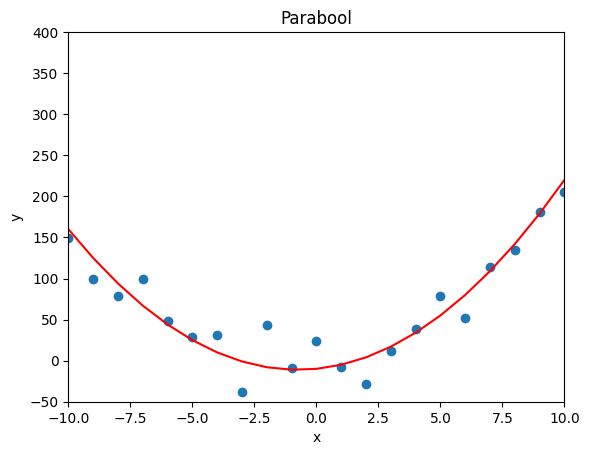

In [54]:
preparePlot("Parabool")
plotCurve(x,y, False)
plotCurve(x,yNoise, True)
showPlot()

## Doel: best fit maken

### ReLU: Rectified Linear Unit

In [55]:
def relu(m, b, x):
    
    y = m * x + b
    
    if y < 0:
        return 0
    else:
        return y

In [56]:
def manualRelu(m, b):
    
    rlu = [relu(m, b, x) for x in x]
    
    preparePlot("Relu")
    plotCurve(x, rlu, False)
    
interact(manualRelu, m=(-10,10,0.1), b=(-10,10,0.1))

interactive(children=(FloatSlider(value=0.0, description='m', max=10.0, min=-10.0), FloatSlider(value=0.0, des…

<function __main__.manualRelu(m, b)>

### Handmatige parabool fit met ReLU

In [57]:
def parabolaFit(m1, b1, m2, b2):
    
    fit = [relu(m1, b1, x) + relu(m2, b2, x) for x in x]
    
    preparePlot("Twee relu's")
    
    plotCurve(x, fit, False)
    plotCurve(x, yNoise, True)
    
    
    showPlot()

interact(parabolaFit, m1=(-50,50,0.01), b1=(-50,50,0.01), m2=(-50,50,0.01), b2=(-50,50,0.01))

interactive(children=(FloatSlider(value=0.0, description='m1', max=50.0, min=-50.0, step=0.01), FloatSlider(va…

<function __main__.parabolaFit(m1, b1, m2, b2)>

### Automatische parabool fit

initial loss:  92.81163720137685
epoch:  0
loss:  59.73026134865199
m1Fit:  8.31648309729432 b1Fit:  1.4696764533432922 m2Fit:  13.561127636076101 b2Fit:  -0.24799465680500446
final loss:  59.73026134865199


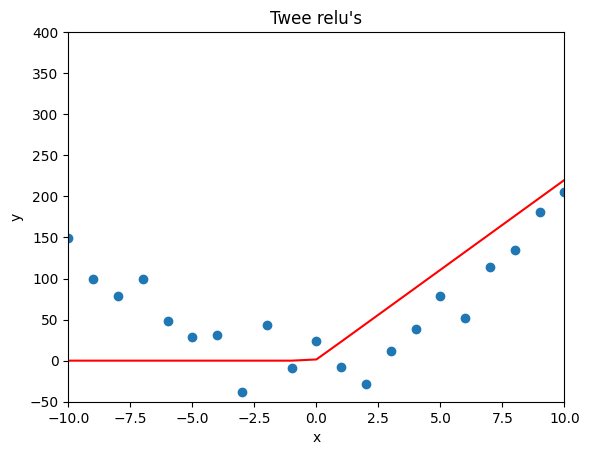

In [58]:
# Learning iterations
epochs = 1

# Learning rate
learningRate = 0.01

#------------------------------------------

# Initial values ("guess")
m1Fit = 0.0
b1Fit = 0.0
m2Fit = 0.0
b2Fit = 0.0

#------------------------------------------

def loss(m1, b1, m2, b2):
    
    l = 0
    
    # Sum of squared errors
    for i in range(0, len(x)):
        
        guess = relu(m1, b1, x[i]) + relu(m2, b2, x[i])
        err = y[i] - guess
        
        l += (err**2)
    
    return math.sqrt(l / len(x))

#------------------------------------------

def gradientDescent(m1, b1, m2, b2, i):
    
    # First guess
    guess1 = relu(m1, b1, x[i]) + relu(m2, b2, x[i])
    err1 = y[i] - guess1

    # print("error: ", err)

    # Stochastic gradient descent
    m1 += err1 * learningRate * x[i]
    b1 += err1 * learningRate
    
    # Second guess
    guess2 = relu(m1, b1, x[i]) + relu(m2, b2, x[i])
    err2 = y[i] - guess2

    # print("error: ", err)

    # Stochastic gradient descent
    m2 += err2 * learningRate * x[i]
    b2 += err2 * learningRate

    # print("m: ", m, "b: ", b)
        
    return m1, b1, m2, b2
    
#------------------------------------------

def train(m1, b1, m2, b2):
    
    for i in range(0, len(x)):

        # Adjust m and b, given input
        m1, b1, m2, b2 = gradientDescent(m1, b1, m2, b2, i)
        
    return m1, b1, m2, b2

#------------------------------------------

epoch = 0

# Inital loss
l = loss(m1Fit, b1Fit, m2Fit, b2Fit)

print("initial loss: ", loss(m1Fit, b1Fit, m2Fit, b2Fit))

#------------------------------------------

while epoch < epochs:
    
    print("epoch: ", epoch)
    
    m1Fit, b1Fit, m2Fit, b2Fit = train(m1Fit, b1Fit, m2Fit, b2Fit)
    
    print("loss: ", loss(m1Fit, b1Fit, m2Fit, b2Fit))
    
    epoch += 1
    
    time.sleep(1)
    
    # plotFit()
    
#------------------------------------------

print("m1Fit: ", m1Fit, "b1Fit: ", b1Fit, "m2Fit: ", m2Fit, "b2Fit: ", b2Fit)
print("final loss: ", loss(m1Fit, b1Fit, m2Fit, b2Fit))

parabolaFit(m1Fit, b1Fit, m2Fit, b2Fit)